# СБОРНЫЙ ПРОЕКТ

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных
* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Первый взгляд на данные

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
data = pd.read_csv('/datasets/games.csv')

In [ ]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Изменить тип данных столбца 'User_score'

In [ ]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
data.loc[data['Critic_Score'].isna()].head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [ ]:
data.loc[data['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


## Замечания по данным:

* Необходимо привести названия столбцов к нижнему регистру
* Изменить тип данных столбца 'User_score' на float
* Обработать пропуски в столбцах 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating' (<font color= darkblue> Пропуски в двух столбцах с оценками и в столбце 'Rating' могут быть связаны с тем, что либо игра была выпущена давно и оценки не сохранились в электронном виде, либо были непопулярны и получили мало оценок. Пропуски в столбцах 'Name' и 'Genre' связаны между собой. Пропуски в столбце 'Year_of_Release' могут быть связаны с отсутсвием по какой-то причине данных о выходе игры, либо с ошибкой при записи данных. ) </font>


# Предобработка данных

Сначала для удобства приведем названия столбцов к нижнему регистру.

In [ ]:
data.columns = map(str.lower, data.columns)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Значение 'tbd' в столбце с рейтингом означает, что оценок недостаточно для расчета средней оценки. Эта запись ничего нам не дает, так что мы можем заменить ее на NaN.

In [ ]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


---
Изменим тип данных столбца 'User_score' на float.

In [ ]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


---
### Обработка пропусков

Удалим 2 строки с пропусками в столбце 'name', так как эти игры имеют пропуски почти во всех столбцах и не помогут нам при анализе.

In [ ]:
data = data.drop(index=[659,14244]).reset_index(drop=True)

In [ ]:
data['name'].isna().sum()

0

Удалим строки, которые имеют пропуски в столбцах year_of_release, critic_score, user_score, rating одновременно, так как в них так же пропущенно слишком много нужной для анализа информации.

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Проверим данные и убедимся, что мы можем их удалить </div>

In [ ]:
nan_data = (data[(data['year_of_release'].isna() == True)
                 &(data['critic_score'].isna() == True)
                 &(data['user_score'].isna() == True)
                 &(data['rating'].isna() == True)])
nan_data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
1300,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1505,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1584,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16057,Dance! It's Your Stage,Wii,NaN,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16077,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16291,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [ ]:
nan_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,0.0,85.000000,85.000000,85.000000,85.000000,0.0,0.0
mean,NaN,0.174588,0.040471,0.060941,0.012706,NaN,NaN
std,NaN,0.377733,0.133737,0.131281,0.049266,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.010000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,0.160000,0.020000,0.060000,0.010000,NaN,NaN
max,NaN,2.360000,1.020000,0.770000,0.410000,NaN,NaN


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> В этих данных нет каких-то выдающихся значений </div>

In [ ]:
nan_data = (data[(data['year_of_release'].isna() == True)
                 &(data['critic_score'].isna() == True)
                 &(data['user_score'].isna() == True)
                 &(data['rating'].isna() == True)].index.values.tolist())

In [ ]:
len(nan_data)

85

Таких строк немного, так что можем их удалить.

In [ ]:
data = data.drop(index=nan_data).reset_index(drop=True)

### Добавим суммарные продажи

In [ ]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [ ]:
print('Количество строк, где были пропущены данные с оценками :', len(data[(data['critic_score'].isna() == True)
                 |(data['user_score'].isna() == True)
                 |(data['rating'].isna() == True)])/ len(data))

Количество строк, где были пропущены данные с оценками : 0.5822107288910272


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Пропусков в столбцах с оценками очень много, болеше 50%, поэтому мы не можем их удалить, так же у нас недостаточно информации чтобы их как-то заполнить, так что оставим их как есть. </div>

# Анализ данных

#### Сколько игр выпускалось в разные годы, важны ли данные за все периоды?

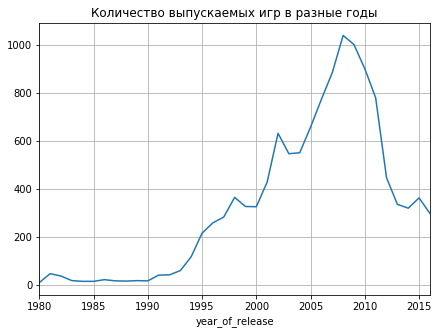

In [ ]:
data.groupby(by='year_of_release')['name'].nunique().plot(grid = True, figsize=(7,5), title='Количество выпускаемых игр в разные годы')
plt.show()

После 1995 года начался рост выпускаемых игр.  Отбросим данные до этого года, так как они нам неважны.

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Я думаю это может быть связано с развитием разработки мобильных игр </div>

In [ ]:
new_data = data.query('year_of_release > 1995')

---
#### Как менялись продажи по платформам? Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

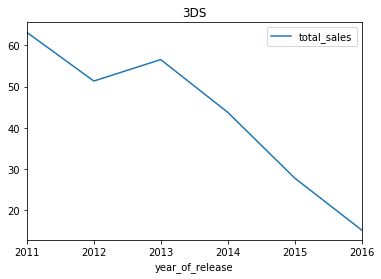

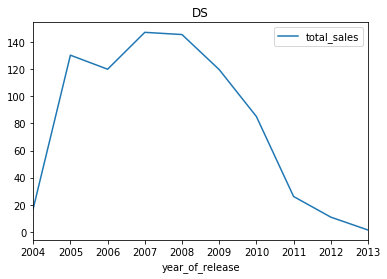

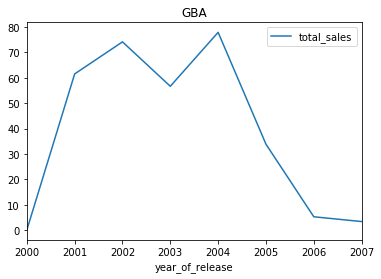

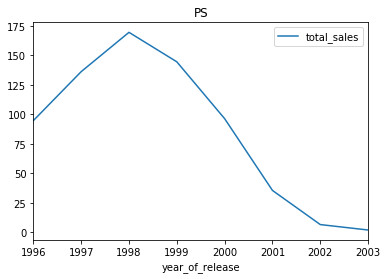

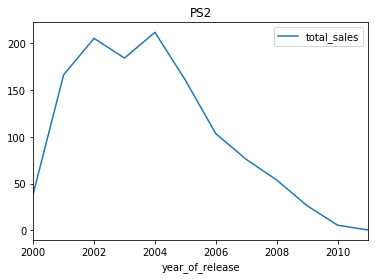

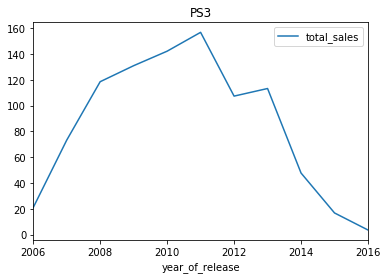

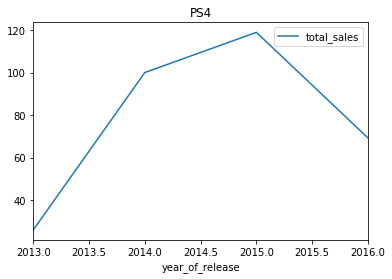

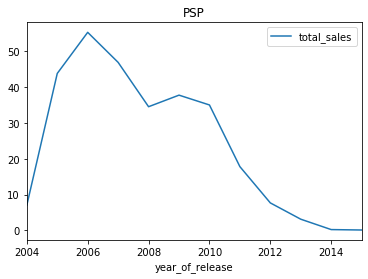

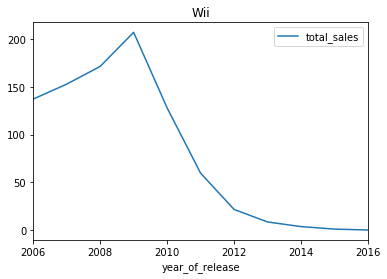

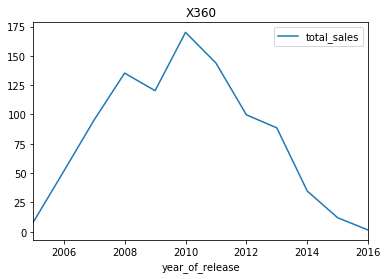

In [ ]:
platform_sales = new_data.groupby(['platform','year_of_release']).agg({'total_sales':'sum'}).reset_index(level = 'year_of_release')
top10_platform = new_data.groupby('platform')['total_sales'].sum().sort_values(ascending = False)[0:10].index
for item in platform_sales.index.unique():
    if item in top10_platform:
        platform_sales[platform_sales.index == item].plot(x = 'year_of_release', y = 'total_sales', title = item)

В топ 10 вошли следующие платформы: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS. 
Из них к 2016 году только у **PS4** продажи остались на уровне, у всех остальных продажи стремятся к нулю.

---
#### За какой характерный срок появляются новые и исчезают старые платформы?

Создадим массив с акутальными на 2016 платформами (на мой взгляд актуальными можно считать те, последняя игра на которых вышла не ранее 2015 года).

In [ ]:
actual_platforms = data.query('year_of_release >= 2015')['platform'].unique()

In [ ]:
actual_platforms

array(['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Посчитаем среднее значение "жизни" платформы, для этого из даты релиза последней игры вычтем дату релиза первой игра на определнной платформе. При этом мы исключили актуальные на 2016 год платформы.

In [ ]:
((data.query('platform not in @ actual_platforms')
  .groupby('platform')['year_of_release'].max() - data.groupby('platform')['year_of_release'].min())
 .mean())

6.809523809523809

Средняя продолжительность "жизни" платформы около 7 лет.

---
#### Актуальный период 

Так как продажи почти у всех платформ стремятся к нулю, то в актуальный период можно выделить последние четыре года, чтобы увидеть у каких платформ больший объем продаж.

In [ ]:
actual_data = data.query('year_of_release >= 2013')

---
#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 2013.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


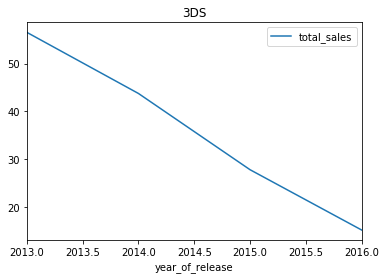

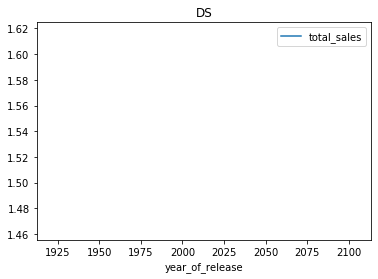

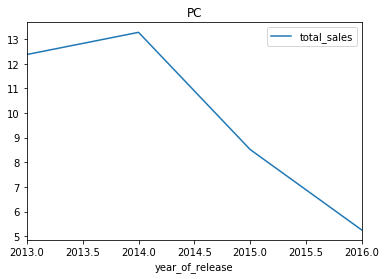

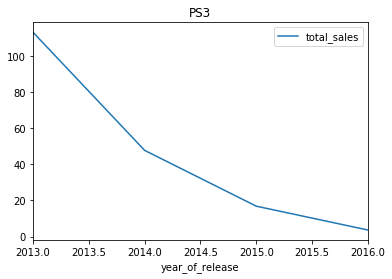

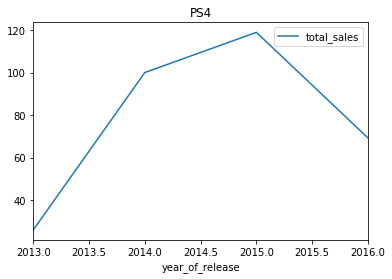

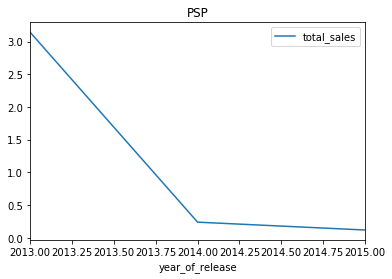

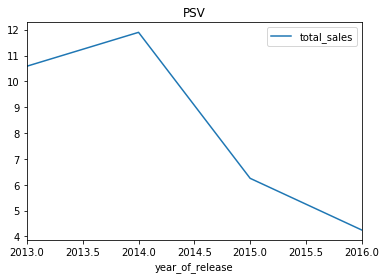

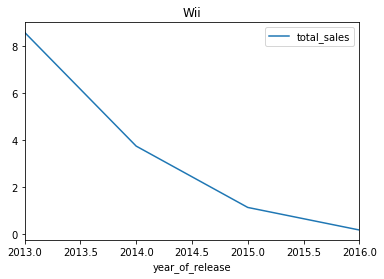

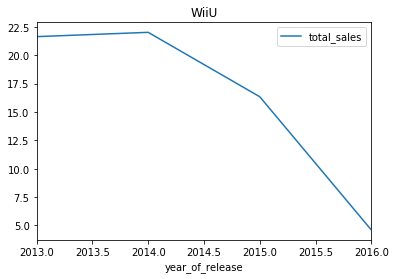

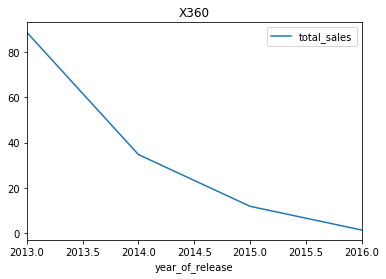

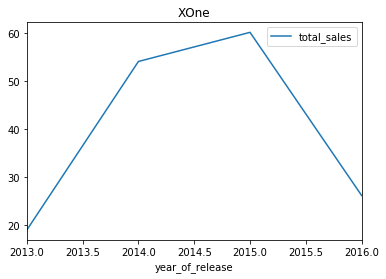

In [ ]:
actual_sales = (actual_data
                .groupby(['platform','year_of_release'])
                .agg({'total_sales':'sum'})
                .reset_index(level = 'year_of_release'))
for item in actual_sales.index.unique():
    actual_sales[actual_sales.index == item].plot(x = 'year_of_release', y = 'total_sales', title = item)

Продажи всех платформ кроме **PS4** и **XOne** упали.

---
#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

(0, 5)

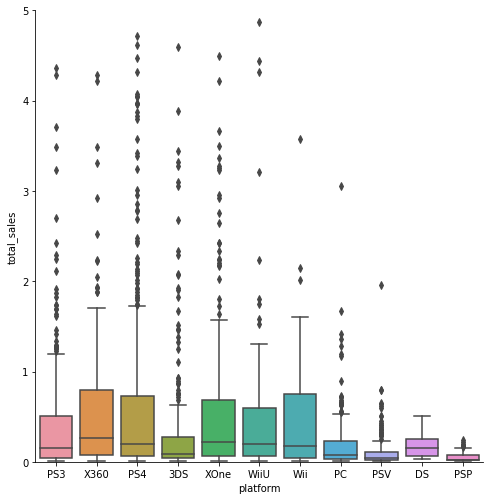

In [ ]:
sns.catplot(x = 'platform',y='total_sales', data=actual_data, kind='box', height=7)
plt.ylim(0, 5)

Медианное значение продаж самых популярных платформ находится примерно на одном уровне. Так же присутвует большое количество выбросов, это может быть связано с выходи очень популярной игры, которую покупают чаще среднестатистической игры.

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Возможно разница формируется из-за того, что это крупные распиаренные платформы, или на этих платформах выходит большее количество игр из-за более простой адаптации под них игр </div>

---
####  Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

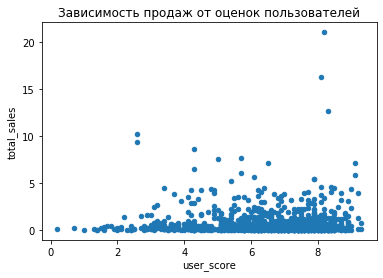

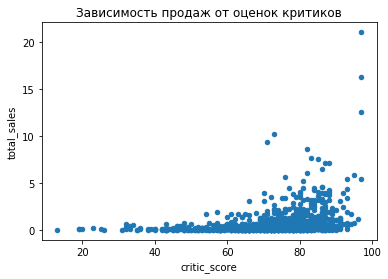

In [ ]:
actual_data.plot(x='user_score', y='total_sales', kind='scatter', title='Зависимость продаж от оценок пользователей')
plt.show()
actual_data.plot(x='critic_score', y='total_sales', kind='scatter', title='Зависимость продаж от оценок критиков')
plt.show()

In [ ]:
print('Корреляция между отзывами пользователей и продажами:', actual_data['total_sales'].corr(actual_data['user_score']))
print('Корреляция между отзывами критиков и продажами:', actual_data['total_sales'].corr(actual_data['critic_score']))

Корреляция между отзывами пользователей и продажами: -0.0026078133545982727
Корреляция между отзывами критиков и продажами: 0.3136995151027369


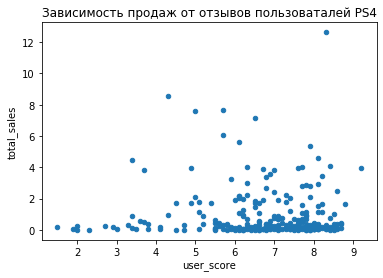

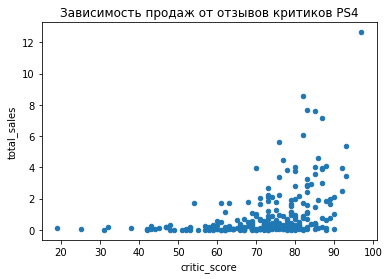

In [ ]:
actual_data.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', title='Зависимость продаж от отзывов пользоваталей PS4')
plt.show()
actual_data.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', title='Зависимость продаж от отзывов критиков PS4')
plt.show()


In [ ]:
print('Корреляция между отзывами пользователей и продажами на платформе PS4', actual_data.query('platform == "PS4"')['user_score'].corr(actual_data.query('platform == "PS4"')['total_sales']) )
print('Корреляция между отзывами критиков и продажами на платформе PS4', actual_data.query('platform == "PS4"')['critic_score'].corr(actual_data.query('platform == "PS4"')['total_sales']) )

Корреляция между отзывами пользователей и продажами на платформе PS4 -0.031957110204556424
Корреляция между отзывами критиков и продажами на платформе PS4 0.40656790206178095


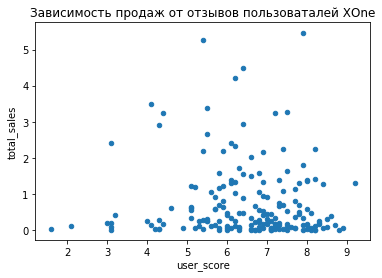

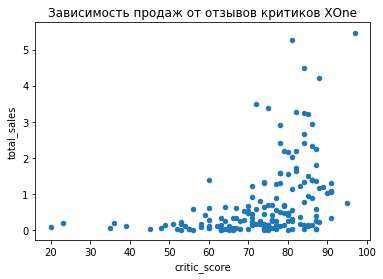

In [ ]:
actual_data.query('platform == "XOne"').plot(x='user_score', y='total_sales', kind='scatter', title='Зависимость продаж от отзывов пользоваталей XOne')
plt.show()
actual_data.query('platform == "XOne"').plot(x='critic_score', y='total_sales', kind='scatter', title='Зависимость продаж от отзывов критиков XOne')
plt.show()

In [ ]:
print('Корреляция между отзывами пользователей и продажами на платформе XOne', actual_data.query('platform == "XOne"')['user_score'].corr(actual_data.query('platform == "XOne"')['total_sales']) )
print('Корреляция между отзывами критиков и продажами на платформе XOne', actual_data.query('platform == "XOne"')['critic_score'].corr(actual_data.query('platform == "XOne"')['total_sales']) )

Корреляция между отзывами пользователей и продажами на платформе XOne -0.06892505328279414
Корреляция между отзывами критиков и продажами на платформе XOne 0.4169983280084017


Похоже что при покупке игр пользователь ориентируется только на оценки критиков.

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Возможно на мнение пользователей отрицательно влияют оценки других пользователй из-за того, что их оценки зачастую эмоционально окрашены и менее объективны, нежели оценки критиков, задача которых объективно оценивать игру. </div>

---
#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
actual_data.groupby('genre').agg({'name':'count', 'total_sales':'sum'}).sort_values(by='name', ascending=False)

,name,total_sales
genre,,
Action,766,321.87
Role-Playing,292,145.89
Adventure,245,23.64
Sports,214,150.65
Shooter,187,232.98
Misc,155,62.82
Racing,85,39.89
Fighting,80,35.31
Platform,74,42.63


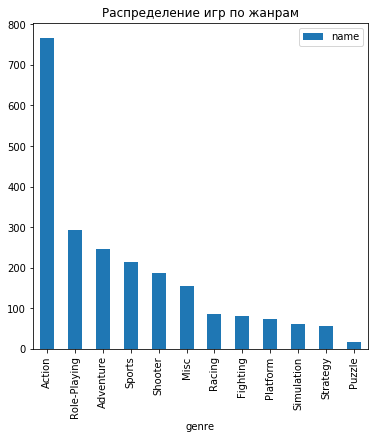

In [ ]:
(actual_data.groupby('genre')
 .agg({'name':'count'})
 .sort_values(by='name', ascending=False)
 .plot(kind='bar', title='Распределение игр по жанрам', figsize=(6,6)))
plt.show()

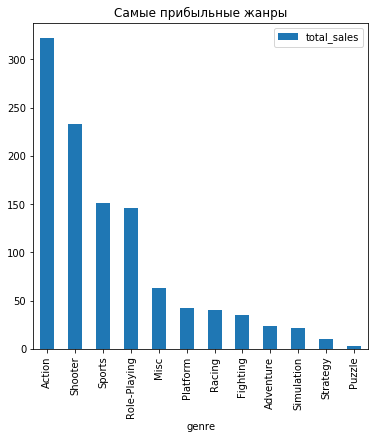

In [ ]:
(actual_data.groupby('genre')
 .agg({'total_sales':'sum'})
 .sort_values(by='total_sales', ascending = False)
 .plot(kind='bar', title='Самые прибыльные жанры', figsize=(6,6)))
plt.show()

Жанр **Action** является абсолютным лидером по количеству выпускаемых игр. При этом, несмотря на то, что игр в жанре **Action** в 4 раза больше чем игр в жанре Shooter суммарные продажи отличются лишь 1.2 раза. Следовательно игры в жанре **Shooter** более прибыльные, но стоит учитывать тот факт, что такие игры более трудно- и времязатратны. Также к самым прибыльным жанрам игр можно отнести **Sports** и **Role-Playing**.

Жанр **Puzzle** с самыми маленькими продажами также является и самым непопулярным у разрабочиков, так как игр в этом жанре меньше всего.


----
# Портрет пользователя каждого региона

#### Определите для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишите различия в долях продаж.

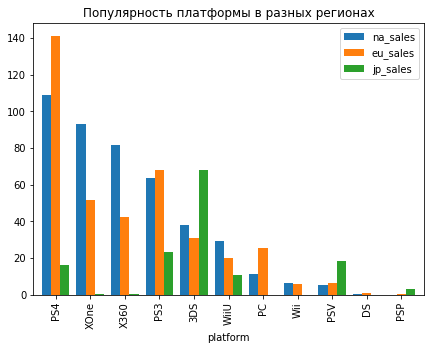

In [ ]:
(actual_data
 .groupby('platform')
 .agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'})
 .sort_values('na_sales', ascending=False)
 .plot(kind='bar', figsize=(7,5), width=0.8, title='Популярность платформы в разных регионах')
)

plt.show() 

Доля продаж =  40.1


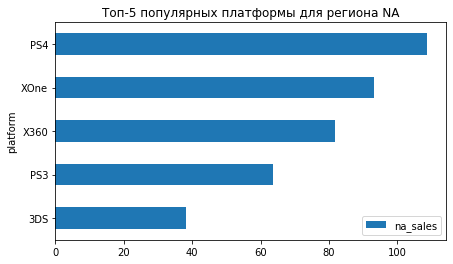

In [ ]:
(actual_data
 .groupby('platform')
 .agg({'na_sales':'sum'})
 .sort_values(by='na_sales', ascending=True)
 .tail()
 .plot(kind='barh',figsize=(7,4), title='Топ-5 популярных платформы для региона NA')
)
print('Доля продаж = ', ((actual_data['na_sales'].sum()) / (actual_data['total_sales'].sum()) * 100).round(1))
plt.show()

Доля продаж =  36.0


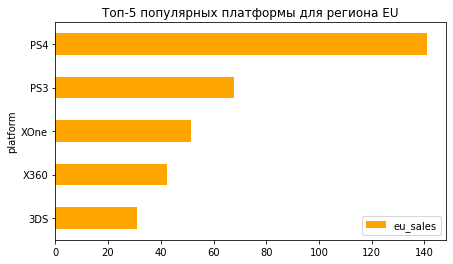

In [ ]:
(actual_data
 .groupby('platform')
 .agg({'eu_sales':'sum'})
 .sort_values(by='eu_sales', ascending=True)
 .tail()
 .plot(kind='barh',figsize=(7,4), color='orange', title='Топ-5 популярных платформы для региона EU')
)
print('Доля продаж = ',((actual_data['eu_sales'].sum()) / (actual_data['total_sales'].sum())*100).round(1))
plt.show()

Доля продаж =  12.9


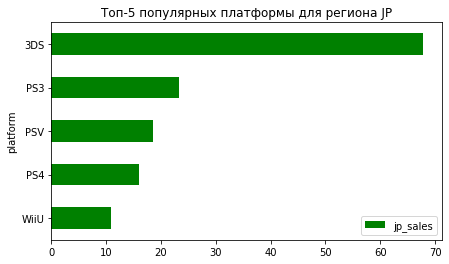

In [ ]:
(actual_data
 .groupby('platform')
 .agg({'jp_sales':'sum'})
 .sort_values(by='jp_sales', ascending=True)
 .tail()
 .plot(kind='barh',figsize=(7,4), color='green', title='Топ-5 популярных платформы для региона JP')
)
print('Доля продаж = ', ((actual_data['jp_sales'].sum())/(actual_data['total_sales'].sum())*100).round(1))
plt.show()

Самая большая доля продаж в **Северной Америке** 40.1%. Популярные платформы в Северной Америке и Европе в целом похожи, на первом месте там **PS4**. В Японии же предпочитают совершенно другие платформы, там на первом месте по популярности **3DS**.

---
#### Определите для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясните разницу.

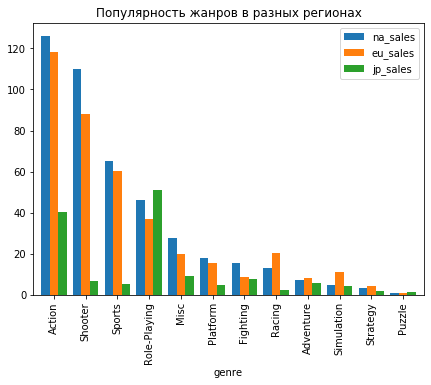

In [ ]:
(actual_data
 .groupby('genre')
 .agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'})
 .sort_values('na_sales', ascending=False)
 .plot(kind='bar', figsize=(7,5), width=0.8, title='Популярность жанров в разных регионах')
)

plt.show() 

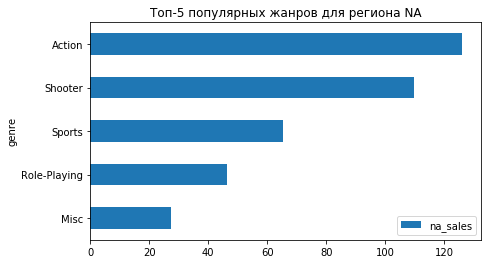

In [ ]:
(actual_data
 .groupby('genre')
 .agg({'na_sales':'sum'})
 .sort_values(by='na_sales', ascending=True)
 .tail()
 .plot(kind='barh',figsize=(7,4), title='Топ-5 популярных жанров для региона NA')
)
plt.show()

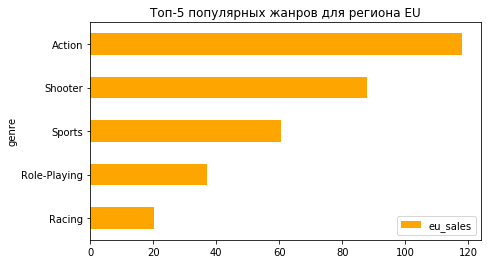

In [ ]:
(actual_data
 .groupby('genre')
 .agg({'eu_sales':'sum'})
 .sort_values(by='eu_sales', ascending=True)
 .tail()
 .plot(kind='barh',figsize=(7,4), color='orange', title='Топ-5 популярных жанров для региона EU')
)
plt.show()

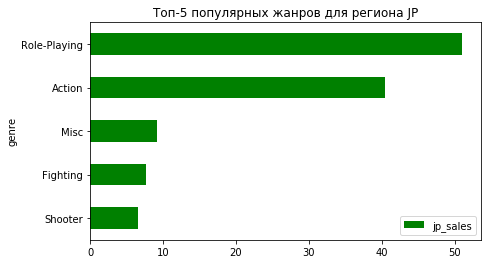

In [ ]:
(actual_data
 .groupby('genre')
 .agg({'jp_sales':'sum'})
 .sort_values(by='jp_sales', ascending=True)
 .tail()
 .plot(kind='barh',figsize=(7,4), color='green', title='Топ-5 популярных жанров для региона JP')
)
plt.show()

Предпочтения в жанрах игр в Северной Америке и Европе также схожи между собой. На первом месте там **Action**. В Японии Action занимает второе место, а лидирует **Role-Playing**.

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Такие отличия Японского рынка могут быть обусловлены совершенно иным менталитетом, культурой и мировосприятием, а так же стоит учитывать тот факт, что в Японии наибольшую популярность имеют мобильные игры. </div>

---
#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Чтобы учесть игры у которых не стоит рейтинг, заполним пропуски значением "без рейтинга" </div>

In [ ]:
actual_data['rating'] = actual_data['rating'].fillna('без рейтинга')
pd.set_option('chained_assignment', None)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


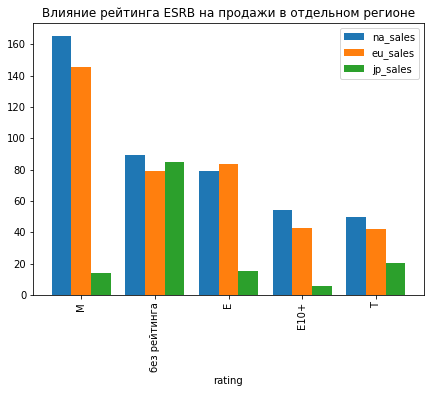

In [ ]:
(actual_data
 .groupby('rating')
 .agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'})
 .sort_values(by='na_sales', ascending=False)
 .plot(kind='bar', figsize=(7,5), width=0.8, title='Влияние рейтинга ESRB на продажи в отдельном регионе')
)
plt.show() 

В Америке и Европе ситуации похожи. Чаще всего покупают игры с рейтингом М, а реже всего с рейтингом Т. В Японии ситуация обратная, там популярны игры с рейтингом Т, самыми непопулярными стали игры с рейтингом Е10+.

---
# Проверка гипотез

**H0** - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H1** - средние пользовательские рейтинги платформ Xbox One и PC отличаются

Для начала сравним диспресии выборок , чтобы понять какой параметр equal_var использовать.

In [ ]:
print('Диспресия выборки платформы Xbox One = ', actual_data.query('platform == "XOne"')['user_score'].var())
print('Диспресия выборки платформы PC = ', actual_data.query('platform == "PC"')['user_score'].var())

Диспресия выборки платформы Xbox One =  1.9069968429360695
Диспресия выборки платформы PC =  3.035892752408881


Диспресии выборок не равны, следовательно необходимо ипользовать параметр equal_var = False

In [ ]:
xone_customer = actual_data.query('platform == "XOne"')['user_score']
xone_customer = xone_customer.dropna()
pc_customer = actual_data.query('platform == "PC"')['user_score']
pc_customer = pc_customer.dropna()
results = st.ttest_ind(xone_customer, pc_customer, equal_var = False)
alpha = .05
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отклонена, значит в среднем пользователи Xbox One и PC ставят одинаковые оценки.

---

**H0** - средние пользовательские рейтинги жанров Action и Sports одинаковые

**H1** - средние пользовательские рейтинги жанров Action и Sports разные

In [ ]:
print('Диспресия выборки жанра Action = ', actual_data.query('genre == "Action"')['user_score'].var())
print('Диспресия выборки жанра Sports = ', actual_data.query('genre == "Sports"')['user_score'].var())

Диспресия выборки жанра Action =  1.7693609042482705
Диспресия выборки жанра Sports =  3.180612814465409


Диспресии выборок не равны, следовательно необходимо ипользовать параметр equal_var = False

In [ ]:
action = actual_data.query('genre == "Action"')['user_score']
action = action.dropna()
sports = actual_data.query('genre == "Sports"')['user_score']
sports = sports.dropna()
results = st.ttest_ind(action, sports, equal_var = False)
alpha = .05
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза отклонена, значит средние пользовательские рейтинги жанров Action и Sports отличаются.

---
# Вывод

Проведя анализ интернет-магазина «Стримчик», который продаёт компьютерные игры по всему миру, я пришла к выводу, что предпочтения Американских и Европейских пользователей сильно отличаются от Японских.  

В Америке и Европе топ-5 самых популярных платформ включают в себя: 
1. **PS4**
2. **XOne**
3. **X360**
4. **PS3**
5. **3DS**

с незначительными различиями по местам.

В Японии же топ-5 выглядит другим образом:
1. **3DS**
2. **PS3**
3. **PSV**
4. **PS4**
5. **WiiU**

Самыми популярными жанрами в Америке и Европе стали: 
* **Action**
* **Shooter**
* **Sports**
* **Role-Playing**
* **Misc**
* **Racing**

В Японии:
* **Role-Playing**
* **Action**
* **Misc**
* **Fighting**
* **Shooter**

В Америке и Европе чаще всего покупают игры с рейтингом **M** (от 17 лет), а самый непопулярный рейтинг **T** (подросткам 13—19 лет), в Японии наоборот игры с рейтингом **Т** являются наиболее популярными.

Такие отличия Японского рынка обусловлены совершенно иным менталитетом, культурой и мировосприятием, а так стоит учитывать тот факт, что в Японии наибольшую популярность имеют мобильные игры.


Если ориентироваться на весь рынок в целом, то можно сделать следующие выводы:
* Наиболее потенциально прибыльными платформами можно считать PS4 и Xbox One, так как за последние 3 года только их продажи не приблизились к нулю;
* На мнение пользователей сильно влияют оценки критиков.


---